# Chapter 6 - Data Sourcing via web

### Segment 4 - Web Scraping

Install beautifulsoup4 in conda
- conda install -c anaconda beautifulsoup4

In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [7]:
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML
import re

### BeautifuSoup objects

In [8]:
r = urllib.request.urlopen('https://analytics.usa.gov/').read()
soup = BeautifulSoup(r, 'lxml')
type(soup)

bs4.BeautifulSoup

In [10]:
print(soup.prettify()[:100])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--



In [11]:
for link in soup.find_all('a'):
    print(link.get('href'))

/
#explanation
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
data/
#top-pages-realtime
#top-pages-7-days
#top-pages-30-days
https://analytics.usa.gov/data/live/all-pages-realtime.csv
https://analytics.usa.gov/data/live/all-domains-30-days.csv
https://www.digitalgov.gov/services/dap/
https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4
https://support.google.com/analytics/answer/2763052?hl=en
https://analytics.usa.gov/data/live/second-level-domains.csv
https://analytics.usa.gov/data/live/sites.csv
mailto:DAP@support.digitalgov.gov
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
mailto:DAP@support.digitalgov.gov
https://github.com/GSA/analytics.usa.gov/issues
https://github.com/GSA/analytics.usa.gov
https://github.com/18F/analytics-reporter
http://www.gsa.gov/
https://www.digitalgov.gov/services/dap/
https://cloud.gov/


In [12]:
print(soup.get_text())
















analytics.usa.gov | The US government's web traffic.







(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-MQSGZS');


    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

    ga('create', 'UA-48605964-36', 'auto');
    ga('set', 'anonymizeIp', true);
    ga('set', 'forceSSL', true);
    ga('send', 'pageview');

  












analytics.usa.gov
              


About this site
Data | API



Select an agen

In [13]:
print(soup.prettify()[0:1000])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--

    Hi! Welcome to our source code.

    This dashboard uses data from the Digital Analytics Program, a US
    government team inside the General Services Administration.


    For a detailed tech breakdown of how 18F and friends built this site:

    https://18f.gsa.gov/2015/03/19/how-we-built-analytics-usa-gov/


    This is a fully open source project, and your contributions are welcome.

    Frontend static site: https://github.com/18F/analytics.usa.gov
    Backend data reporting: https://github.com/18F/analytics-reporter

    -->
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="NjbZn6hQe7OwV-nTsa6nLmtrOUcSGPRyFjxm5zkmCcg" name="google-site-verification"/>
  <link href="/css/vendor/css/uswds.v0.9.6.css" rel="stylesheet"/>
  <link href="/css/public_analytics.css" rel="stylesheet"/>
  <link href="/images/analytics-favicon.ico" rel="ic

In [20]:
for x in soup.findAll('a', attrs={'href': re.compile('^http')}):
    print(x)

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the data here.</a>
<

In [22]:
file = open('parsed_data2.txt', 'w') #write in the text file
for link in soup.findAll('a', attrs={'href': re.compile('^http')}):
    soup_link = str(link)
    print(soup_link)
    file.write(soup_link)
file.flush()
file.close()

%pwd

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the data here.</a>
<

'C:\\Users\\marjo\\PycharmProjects\\Summer_2020_Challenge\\PythonDataVisualization'

## Introduction to NLP

### Sentence Tokenization

it is the process of breaking down paragraphs or a complete set of text into sentences.

### Word Tokenization
process of breaking down a paragraph, a sentence or a complete text corpus into an array of words

### Stop words
it is extremely common (thus general) words that add little to little meaning to a body of text at large

Stop words can be thought of as a noise in the corpus of a body of text (ex: they'd)

we will be using the natural language toolkit. it has its own stop words

Stemming
- process for reducing the size of the corpus by converting words to their root word It is a process of word normalization

- stems are simply parts of words
ex: run, running, ran - root word is run

root word vs base word
root word is a stem word that may or may not have meaning when taken alone
A root word from which other words are derived
the primary form of a word upon which derivates are made

base word is a stem word that has meaning when taken alone
it is a base word that is used outright within a language with only prefixes or suffixes being attached

#### Lemmatizing
- process of reducing a word to its base word
ex: better - base word - good

Part of speech tagging - process of identifying a part of speech within a given body of text
ex: 'Everything is all about resources' 
tagged output: NN(noun, singular), VBZ(verb, third person), IN, NNS

#### Frequency distribution plotting
- it counts plots the frequency of words in a given text
- this can be used for sentiment analysis and to understand the distribution of words

### Segment 5- Intro to NLP

conda install -c anaconda nltk


In [23]:
import nltk

In [24]:
text = 'This is a hard problem, and we will continue to make change and actively seek ways to take meaningful action. The Diversity and Inclusion Council’s role is to serve as a convener and focal point for these issues within ACM and to serve as a resource for those seeking to effect positive change; the D&I Council does not set policy.'

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marjo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Sentence Tokenizer

In [27]:
from nltk.tokenize import sent_tokenize
sent_tk = sent_tokenize(text)
print('Sentence Tokenizing the text: \n')
print(sent_tk)

# it will be broken into different tokens

Sentence Tokenizing the text: 

['This is a hard problem, and we will continue to make change and actively seek ways to take meaningful action.', 'The Diversity and Inclusion Council’s role is to serve as a convener and focal point for these issues within ACM and to serve as a resource for those seeking to effect positive change; the D&I Council does not set policy.']


#### Word Tokenizer

In [28]:
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(text)
print('Word Tokenizing the text: \n')
print(word_tk)

# it will print out an array of strings

Word Tokenizing the text: 

['This', 'is', 'a', 'hard', 'problem', ',', 'and', 'we', 'will', 'continue', 'to', 'make', 'change', 'and', 'actively', 'seek', 'ways', 'to', 'take', 'meaningful', 'action', '.', 'The', 'Diversity', 'and', 'Inclusion', 'Council', '’', 's', 'role', 'is', 'to', 'serve', 'as', 'a', 'convener', 'and', 'focal', 'point', 'for', 'these', 'issues', 'within', 'ACM', 'and', 'to', 'serve', 'as', 'a', 'resource', 'for', 'those', 'seeking', 'to', 'effect', 'positive', 'change', ';', 'the', 'D', '&', 'I', 'Council', 'does', 'not', 'set', 'policy', '.']


#### Removing stop words

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marjo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
print('Stop words in English language are: \n')
print(sw)

Stop words in English language are: 

{'from', 'doesn', "you're", 'was', "she's", 'before', 'needn', "hadn't", "you'll", 'wasn', 'more', "doesn't", 'only', "should've", 'o', 'hasn', 'into', 'on', 've', 'whom', 'do', 'they', 'should', 'm', 'of', 'me', 'she', 'how', 'did', "couldn't", 'won', 'than', "mustn't", 'he', 'him', 'can', 'has', 'be', 'myself', 'theirs', 'over', 'are', 'will', "you'd", 'under', "haven't", 'why', 'll', 'all', 'is', 'haven', 'mustn', 'your', 'such', 'because', 'nor', 'no', 'against', 'if', 'yourselves', "shouldn't", 'y', 'itself', 'further', "needn't", 'with', 'ma', 'while', 'off', 'both', 'too', 'mightn', "don't", 'd', "mightn't", 'who', "didn't", 'own', "that'll", "shan't", "wasn't", 'what', 'it', 'where', "aren't", 'couldn', 'their', 'down', 'doing', 'didn', 'her', "you've", 'were', 'below', 'himself', 'but', 'an', 'themselves', "wouldn't", 'few', 'ourselves', 'the', 'yourself', 'does', 're', "hasn't", 'shouldn', 'some', 'through', 't', 'hadn', 'again', 'herself

In [36]:
filtered_words = [w for w in word_tk if not w in sw]
print('The text after removing stop words: \n')
print(filtered_words)

The text after removing stop words: 

['This', 'hard', 'problem', ',', 'continue', 'make', 'change', 'actively', 'seek', 'ways', 'take', 'meaningful', 'action', '.', 'The', 'Diversity', 'Inclusion', 'Council', '’', 'role', 'serve', 'convener', 'focal', 'point', 'issues', 'within', 'ACM', 'serve', 'resource', 'seeking', 'effect', 'positive', 'change', ';', 'D', '&', 'I', 'Council', 'set', 'policy', '.']


#### Cleaning and Stemming textual data

In [33]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()


In [37]:
stemmed_words = []

for w in filtered_words:
    stemmed_words.append(port_stem.stem(w))
    
print('Filtered sentence: \n', filtered_words, '\n')
print('Stemmed Sentence: \n', stemmed_words)

Filtered sentence: 
 ['This', 'hard', 'problem', ',', 'continue', 'make', 'change', 'actively', 'seek', 'ways', 'take', 'meaningful', 'action', '.', 'The', 'Diversity', 'Inclusion', 'Council', '’', 'role', 'serve', 'convener', 'focal', 'point', 'issues', 'within', 'ACM', 'serve', 'resource', 'seeking', 'effect', 'positive', 'change', ';', 'D', '&', 'I', 'Council', 'set', 'policy', '.'] 

Stemmed Sentence: 
 ['thi', 'hard', 'problem', ',', 'continu', 'make', 'chang', 'activ', 'seek', 'way', 'take', 'meaning', 'action', '.', 'the', 'divers', 'inclus', 'council', '’', 'role', 'serv', 'conven', 'focal', 'point', 'issu', 'within', 'acm', 'serv', 'resourc', 'seek', 'effect', 'posit', 'chang', ';', 'D', '&', 'I', 'council', 'set', 'polici', '.']


### Lemmatizing

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marjo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [40]:
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

lemm_words = []

for w in range(len(filtered_words)):
    lemm_words.append(lem.lemmatize(filtered_words[w]))
print(lemm_words)

['This', 'hard', 'problem', ',', 'continue', 'make', 'change', 'actively', 'seek', 'way', 'take', 'meaningful', 'action', '.', 'The', 'Diversity', 'Inclusion', 'Council', '’', 'role', 'serve', 'convener', 'focal', 'point', 'issue', 'within', 'ACM', 'serve', 'resource', 'seeking', 'effect', 'positive', 'change', ';', 'D', '&', 'I', 'Council', 'set', 'policy', '.']


#### Parts of Speech Tagging

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marjo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [42]:
from nltk import pos_tag
pos_tagged_words = pos_tag(word_tk)

print(pos_tagged_words)


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('hard', 'JJ'), ('problem', 'NN'), (',', ','), ('and', 'CC'), ('we', 'PRP'), ('will', 'MD'), ('continue', 'VB'), ('to', 'TO'), ('make', 'VB'), ('change', 'NN'), ('and', 'CC'), ('actively', 'RB'), ('seek', 'JJ'), ('ways', 'NNS'), ('to', 'TO'), ('take', 'VB'), ('meaningful', 'JJ'), ('action', 'NN'), ('.', '.'), ('The', 'DT'), ('Diversity', 'NNP'), ('and', 'CC'), ('Inclusion', 'NNP'), ('Council', 'NNP'), ('’', 'NNP'), ('s', 'JJ'), ('role', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('serve', 'VB'), ('as', 'IN'), ('a', 'DT'), ('convener', 'NN'), ('and', 'CC'), ('focal', 'JJ'), ('point', 'NN'), ('for', 'IN'), ('these', 'DT'), ('issues', 'NNS'), ('within', 'IN'), ('ACM', 'NNP'), ('and', 'CC'), ('to', 'TO'), ('serve', 'VB'), ('as', 'IN'), ('a', 'DT'), ('resource', 'NN'), ('for', 'IN'), ('those', 'DT'), ('seeking', 'VBG'), ('to', 'TO'), ('effect', 'NN'), ('positive', 'JJ'), ('change', 'NN'), (';', ':'), ('the', 'DT'), ('D', 'NNP'), ('&', 'CC'), ('I', 'PRP'

#### Frequency Distribution Plots

In [43]:
from nltk.probability import FreqDist
fd = FreqDist(word_tk)

print(fd)

<FreqDist with 51 samples and 68 outcomes>


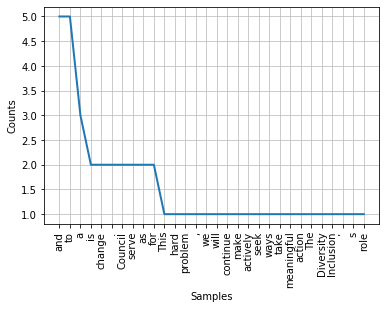

In [47]:
import matplotlib.pyplot as plt

fd.plot(30, cumulative=False)
plt.show()

# you would see the highest words that are frequently showing up. this is why stop words needs to be removed